# 题目例子
## 一、简答题

1. 写出下面语句执行后的答案
    ```python
    print('Hello' == 'hello')
    ```

In [1]:
print('Hello'=='hello')

False


答案是`False`。

---
   
2. 写出下面语句执行后的答案
    ```python
    a = [5, 'tree', True, 3.8]
    print(a[1]+str(a[3]))
    ```

In [2]:
a = [5, 'tree', True, 3.8]
print(a[1]+str(a[3]))

tree3.8


答案是`tree3.8`。

---

3. 要用matplotlib画出并显示$y=x^3-13x^2+47x-35$的曲线，请补全三行代码：
    ```python
    import matplotlib.pyplot as plt
    x = [i*0.2 for i in range(40)]
    ```

In [3]:
import matplotlib.pyplot as plt
x = [i*0.2 for i in range(40)]

答案如下：

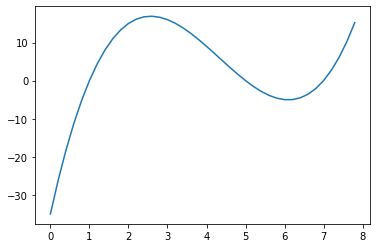

In [4]:
y=[i**3-13*i**2+47*i-35 for i in x]
plt.plot(x,y)
plt.show()

---

4. 写出下面语句执行后的答案
    ```python
    import numpy as np
    a = np.arange(12)
    a.shape = (3,4)
    print(a[:,1:3])
    ```

In [5]:
import numpy as np
a = np.arange(12)
a.shape = (3,4)
print(a[:,1:3])

[[ 1  2]
 [ 5  6]
 [ 9 10]]


答案如上。

---

5. 已知df变量是DataFrame类型，内容为

| | city | year | 订购量 |
|-|-|-|-|
| 0 | Beijing | 2000 | 12 |
| 1 | shanghai | 2001 | 55 |
| 2 | shenzhen | 2002 | 33 |

要新增一列，列名为“参评人数”，其值为“78,42,51”，请写一行代码实现：

In [6]:
import pandas as pd
df=pd.DataFrame(data={
    'city':["Beijing","shanghai","shenzhen"],
    'year':[2000,2001,2002],
    '订购量':[12,55,33]
})

答案如下：

In [7]:
df['参评人数']=[78,42,51]

验证如下：

In [8]:
df

,city,year,订购量,参评人数
0,Beijing,2000,12,78
1,shanghai,2001,55,42
2,shenzhen,2002,33,51


---

6. 解释代码`with open('afile.txt','r') as f: print(f.read())`想做什么

答：以只读(`read`)模式打开`afile.txt`文本文件，并输出其中的内容。

---

7. 已知
`a = np.array([1,3,1]); b = np.array([2,4,3])`
，写出向量`a`,`b`点乘和叉乘代码

In [9]:
import numpy as np
a = np.array([1,3,1]); b = np.array([2,4,3])
print(np.dot(a,b))
print(np.cross(a,b))

17
[ 5 -1 -2]


答案为：
```python
np.dot(a,b)
np.cross(a,b)
```


---

## 二
已知有$n$个元素的列表`L`，编写一个函数`movelist`，使其前面各元素顺序向后移$m$个位置，最后$m$个元素变成最前面的$m$个元素，返回新的列表`L2`。主程序用`L=[3;True;7;"hello";8;9;10],m= 3`调用此函数，打印所得的新列表

In [10]:
def movelist(L,m):
    n=len(L)
    G=[None]*n
    for i in range(n):
        G[i]=L[(i-m)%n]
    # G[:m] = L[-m:]
    # G[m:] = L[:n-m]
    return G

L=[3,True,7,"hello",8,9,10];m=3
movelist(L,m)

[8, 9, 10, 3, True, 7, 'hello']

因此，答案如下：
```python
def movelist(L,m):
    n=len(L)
    G=[None]*n
    for i in range(n):
        G[i]=L[(i-m)%n]
    return G
```

---

## 三
方程
$$
\frac{d^2x}{dt^2}+a\frac{dx}{dt}+bx=F\cos \left( ct \right) 
$$
中取$a=0.2,b=1,F=0.1,c=1$。令$v=\frac{dx}{dt}$。初始$t=0$时刻，取三个初值点为$P(x=1,v=0),Q(x=0,v=1),W(x=2,v=0.5)$，三个点形成一个三角形$\triangle \text{PQW}$。编程计算三角形$\triangle \text{PQW}$的周长$L(t)$随着时间的变化（取$t=0\sim99$），画出$L(t)$的曲线图


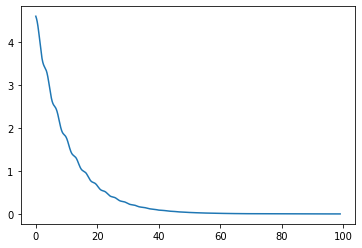

In [32]:
import numpy as np
import matplotlib.pyplot as plt
def move(X0,t,dt=1):
    a=0.2;b=1;F=0.1;c=1
    x0,v0 = X0
    acc = F*np.cos(c*t) - b*x0 - a*v0
    x = x0 + v0*dt
    v = v0 + acc*dt
    return (x,v)

def Len(P,Q):
    return np.sqrt((P[0]-Q[0])**2+(P[1]-Q[1])**2)
def Lt(P,Q,W):
    return Len(P,Q)+Len(P,W)+Len(Q,W)

P = (1,0);Q=(0,1);W=(2,0.5)
t0 = 0;t1 = 99;dt=0.005
T = np.arange(t0,t1,dt)
L = [Lt(P,Q,W)]
for t in T:
    P = move(P,t,dt)
    Q = move(Q,t,dt)
    W = move(W,t,dt)
    L.append(Lt(P,Q,W))
plt.plot(np.append(T,T[-1]+dt),L)
plt.show()

---

## 四
'fastfood.csv'文件是一段时期的快餐订单数据，内容如下表所示，请以pandas为主编程计算表中的：

（1）将`item_price`转化为浮点数。

（2）下单数量最多商品是什么？

（3）在该数据集对应的时期内，卖商品所得收入是多少？

|  order_id  |  quantity  |  item_name  |  item_price  |
|-|-|-|-|
| 1 | 1 |  Chips and Fresh Tomato Salsa  | $ 2.39 |
| 1 | 1 |  Izze  | $ 3.39 |
| 1 | 1 |  Nantucket Nectar  | $ 3.39 |
| 1 | 1 |  Chips and Tomatillo-Green Chili Salsa  | $ 2.39 |
| 2 | 2 |  Chicken Bowl  | $ 16.98 |
| 3 | 1 |  Chicken Bowl  | $ 10.98 |
| 3 | 1 |  Side of Chips  | $ 1.69 |
| 4 | 1 |  Steak Burrito  | $ 11.75 |
| 4 | 1 |  Steak Soft Tacos  | $ 9.25 |
| ...... | ...... | ....... | |

In [12]:
import pandas as pd
dt=pd.read_csv('fastfood.csv',delimiter=',')
dt.head()

,order_id,quantity,item_name,item_price
0,1,1,Chips and Fresh Tomato Salsa,$2.39
1,1,1,Izze,$3.39
2,1,1,Nantucket Nectar,$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,$2.39
4,2,2,Chicken Bowl,$16.98


（1）将`item_price`转化为浮点数。

In [13]:
price=dt['item_price'].tolist()
for i in range(len(price)):
    price[i]=float(price[i][1:])
dt['item_price']=price
dt.head()

,order_id,quantity,item_name,item_price
0,1,1,Chips and Fresh Tomato Salsa,2.39
1,1,1,Izze,3.39
2,1,1,Nantucket Nectar,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39
4,2,2,Chicken Bowl,16.98


（2）下单数量最多商品是什么？

In [14]:
Num = dt.groupby('item_name').size()
print('下单最多的商品是:%s'%Num.index[Num.argmax()])

下单最多的商品是: Chicken Bowl


（3）在该数据集对应的时期内，卖商品所得收入是多少？

In [15]:
print('在该数据集对应的时期内，卖商品所得收入是$%.2f。'%dt['item_price'].sum())

在该数据集对应的时期内，卖商品所得收入是$62.21。


## 五
已知电影分类如下，利用搞笑镜头、拥抱镜头、打斗镜头的数据，使用k近邻方法判断电影“唐人街探案”属于那种类型的电影（取k=3）。

|  |  搞笑镜头  |  拥抱镜头  |  打斗镜头  |  电影类型  |
|-|-|-|-|-|
| 叶问3 | 3 |  2  | 65 | 动作片 |
| 夜孔雀 | 9 |  39  | 8 | 爱情片 |
| 奔爱  | 7 |  46  | 4 | 爱情片 |
| 宝贝当家 | 45 |  2  | 9 | 喜剧片 |
| 美人鱼 | 21 |  17  | 5 | 喜剧片 |
| 谍影重重 | 5 |  2  | 57 | 动作片 |
| 唐人街探案 | 23 |  3  | 17 | ？片 |


|  |  dist  |  电影类型  |
|-|-|-|
| 叶问3 | $\sqrt{\left( 3-23 \right) ^2+\left( 2-3 \right) ^2+\left( 65-17 \right) ^2}=52.0096$ | 动作片 |
| 夜孔雀 | $\sqrt{\left( 9-23 \right) ^2+\left( 39-3 \right) ^2+\left( 8-17 \right) ^2}=39.6611$ | 爱情片 |
| 奔爱  | $\sqrt{\left( 7-23 \right) ^2+\left( 46-3 \right) ^2+\left( 4-17 \right) ^2}=47.6865$ | 爱情片 |
| 宝贝当家 | $\sqrt{\left( 45-23 \right) ^2+\left( 2-3 \right) ^2+\left( 9-17 \right) ^2}=23.4307$ | 喜剧片 |
| 美人鱼 | $\sqrt{\left( 21-23 \right) ^2+\left( 17-3 \right) ^2+\left( 5-17 \right) ^2}=18.5472$ | 喜剧片 |
| 谍影重重 | $\sqrt{\left( 5-23 \right) ^2+\left( 2-3 \right) ^2+\left( 57-17 \right) ^2}=43.8748$ | 动作片 |

| 按dist顺序前k个 |  dist  |  电影类型  |
|-|-|-|
| 美人鱼 | 18.5472 | 喜剧片 |
| 宝贝当家 | 23.4307 | 喜剧片 |
| 夜孔雀 | 39.6611 | 爱情片 |


| 电影类型 |  k中占比  |  占比最大  |
|-|-|-|
| 喜剧片 |  2  |  $\ast$  |
| 爱情片 |  1  ||

综上，“唐人街探案”属于喜剧片类型的电影。

**以下通过程序验证**

In [5]:
import numpy as np
import pandas as pd
dt=pd.DataFrame({
    '电影名':['叶问3','夜孔雀','奔爱','宝贝当家','美人鱼','谍影重重','唐人街探案'],
    '搞笑镜头':[3,9,7,45,21,5,23],
    '拥抱镜头':[2,39,46,2,17,2,3],
    '打斗镜头':[65,8,4,9,5,57,17],
    '电影类型':['动作片','爱情片','爱情片','喜剧片','喜剧片','动作片','？片']
    })
dt=dt.set_index('电影名')
dt_train = dt.iloc[:-1]
dt

,搞笑镜头,拥抱镜头,打斗镜头,电影类型
电影名,,,,
叶问3,3,2,65,动作片
夜孔雀,9,39,8,爱情片
奔爱,7,46,4,爱情片
宝贝当家,45,2,9,喜剧片
美人鱼,21,17,5,喜剧片
谍影重重,5,2,57,动作片
唐人街探案,23,3,17,？片


In [6]:
dt_test = dt.iloc[-1,:-1]
dt_test

搞笑镜头    23
拥抱镜头     3
打斗镜头    17
Name: 唐人街探案, dtype: object

In [7]:
def knn_pt(pt, df, k):
    ''' 返回k近邻的分类值。 df的最后一列是分类值，前面的列是属性值'''
    assert( len(pt)+1 == len(df.columns) )
    df1 = df.copy()
    df1['dist'] = 0 # 计算距离
    for i in range(len(pt)):
        df1['dist'] += (df1[df1.columns[i]] - pt[i])**2
    df1['dist'] = np.sqrt(df1['dist'])
    print(df1)
    df2 = df1.sort_values(by='dist') # 按距离排序
    df2 = df2[:k] # 取前k个
    target = df2[df2.columns[-2]].value_counts().index[0] # 取最多的那个
    return target
    #return target, df2 # for debuging

In [8]:
res = knn_pt(dt_test.copy(), dt_train, 3)
print('“%s”属于%s类型的电影。'%(dt_test.name,res))

      搞笑镜头  拥抱镜头  打斗镜头 电影类型       dist
电影名                                   
叶问3      3     2    65  动作片  52.009614
夜孔雀      9    39     8  爱情片  39.661064
奔爱       7    46     4  爱情片  47.686476
宝贝当家    45     2     9  喜剧片  23.430749
美人鱼     21    17     5  喜剧片  18.547237
谍影重重     5     2    57  动作片  43.874822
“唐人街探案”属于喜剧片类型的电影。


## 六
根据下表的数据，求出判断是否同意贷款的决策树（只求根节点字段）。
| ID | 年龄 | 有工作 | 有自己的房子 | 信贷情况 | 类别（是否同意贷款） |
|----|----|-----|--------|------|------------|
| 1  | 青年 | 否   | 否      | 一般   | 否          |
| 2  | 青年 | 否   | 否      | 好    | 否          |
| 3  | 青年 | 是   | 否      | 好    | 是          |
| 4  | 青年 | 是   | 是      | 一般   | 是          |
| 5  | 青年 | 否   | 否      | 一般   | 否          |
| 6  | 中年 | 否   | 否      | 一般   | 否          |
| 7  | 中年 | 否   | 否      | 好    | 否          |
| 8  | 中年 | 是   | 是      | 好    | 是          |
| 9  | 中年 | 否   | 是      | 非常好  | 是          |
| 10 | 中年 | 否   | 是      | 非常好  | 是          |
| 11 | 老年 | 否   | 是      | 非常好  | 是          |
| 12 | 老年 | 否   | 是      | 好    | 是          |
| 13 | 老年 | 是   | 否      | 好    | 是          |
| 14 | 老年 | 是   | 否      | 非常好  | 是          |
| 15 | 老年 | 否   | 否      | 一般   | 否          |


### 0. 总
$$
p_{+}=\frac{N_{+}}{N}=\frac{9}{15}=\frac{3}{5}\qquad p_{-}=\frac{N_{-}}{N}=\frac{2}{5}\\
H(T)=-p_{+}\log_2{p_{+}}-p_{-}\log_2{p_{-}}=\frac{3}{5}\log_2{\frac{5}{3}}+\frac{2}{5}\log_2{\frac{5}{2}}\approx0.970951
$$
### 1. 年龄
#### 1.1 青年
$$
p_{1+}=\frac{N_{1+}}{N_{1}}=\frac{2}{5}\qquad p_{1-}=\frac{N_{1-}}{N_{1}}=\frac{3}{5}\qquad P_{1}=\frac{|T_{1}|}{|T|}=\frac{5}{15}=\frac{1}{3}\\
H(T_{1})=-p_{+}\log_2{p_{+}}-p_{-}\log_2{p_{-}}=\frac{2}{5}\log_2{\frac{5}{2}}+\frac{3}{5}\log_2{\frac{5}{3}}\approx0.970951\\
$$
#### 1.2 中年
$$
p_{1+}=\frac{N_{1+}}{N_{1}}=\frac{3}{5}\qquad p_{1-}=\frac{N_{1-}}{N_{1}}=\frac{2}{5}\qquad P_{1}=\frac{|T_{1}|}{|T|}=\frac{5}{15}=\frac{1}{3}\\
H(T_{1})=-p_{+}\log_2{p_{+}}-p_{-}\log_2{p_{-}}=\frac{3}{5}\log_2{\frac{5}{3}}+\frac{2}{5}\log_2{\frac{5}{2}}\approx0.970951\\
$$
#### 1.3 老年
$$
p_{1+}=\frac{N_{1+}}{N_{1}}=\frac{4}{5}\qquad p_{1-}=\frac{N_{1-}}{N_{1}}=\frac{1}{5}\qquad P_{1}=\frac{|T_{1}|}{|T|}=\frac{5}{15}=\frac{1}{3}\\
H(T_{1})=-p_{+}\log_2{p_{+}}-p_{-}\log_2{p_{-}}=\frac{4}{5}\log_2{\frac{5}{4}}+\frac{1}{5}\log_2{5}\approx0.721928\\
$$
#### 1.4 综合
$$
H(T,年龄)=\sum_i^3{P_{i}\cdot H(T_{i})}=\frac{1}{3}\times0.970951+\frac{1}{3}\times0.970951+\frac{1}{3}\times0.721928\approx0.887943\\
I(T,年龄)=H(T)-H(T,年龄)=0.970951-0.887943=0.083008
$$


### 2. 有工作
#### 2.1 是
$$
p_{1+}=\frac{N_{1+}}{N_{1}}=1\qquad p_{1-}=\frac{N_{1-}}{N_{1}}=0\qquad P_{1}=\frac{|T_{1}|}{|T|}=\frac{1}{3}\\
H(T_{1})=-p_{+}\log_2{p_{+}}-p_{-}\log_2{p_{-}}=-\log_2{1}-\lim_{x\rightarrow 0}{[x\ln{x}]}=0\\
$$
#### 2.2 否
$$
p_{2+}=\frac{N_{2+}}{N_{2}}=\frac{2}{5}\qquad p_{2-}=\frac{N_{2-}}{N_{2}}=\frac{3}{5}\qquad P_{2}=\frac{|T_{2}|}{|T|}=\frac{2}{3}\\
H(T_{2})=-p_{+}\log_2{p_{+}}-p_{-}\log_2{p_{-}}=\frac{2}{5}\log_2{\frac{5}{2}}+\frac{3}{5}\log_2{\frac{5}{3}}=0.970951\\
$$
#### 2.3 综合
$$
H(T,有工作)=\sum_i^2{P_{i}\cdot H(T_{i})}=\frac{1}{3}\times0+\frac{2}{3}\times0.970951\approx0.647301\\
I(T,有工作)=H(T)-H(T,有工作)=0.970951-0.647301=0.32365
$$

### 3. 有自己的房子
#### 3.1 是
$$
p_{1+}=\frac{N_{1+}}{N_{1}}=1\qquad p_{1-}=\frac{N_{1-}}{N_{1}}=0\qquad P_{1}=\frac{|T_{1}|}{|T|}=\frac{2}{5}\\
H(T_{1})=-p_{+}\log_2{p_{+}}-p_{-}\log_2{p_{-}}=-\log_2{1}-\lim_{x\rightarrow 0}{[x\ln{x}]}=0\\
$$
#### 3.2 否
$$
p_{2+}=\frac{N_{2+}}{N_{2}}=\frac{1}{3}\qquad p_{2-}=\frac{N_{2-}}{N_{2}}=\frac{2}{3}\qquad P_{2}=\frac{|T_{2}|}{|T|}=\frac{3}{5}\\
H(T_{2})=-p_{+}\log_2{p_{+}}-p_{-}\log_2{p_{-}}=\frac{1}{3}\log_2{3}+\frac{2}{3}\log_2{\frac{3}{2}}=0.918296\\
$$
#### 3.3 综合
$$
H(T,有自己的房子)=\sum_i^3{P_{i}\cdot H(T_{i})}=\frac{2}{5}\times0+\frac{3}{5}\times0.918296=0.550978\\
I(T,有自己的房子)=H(T)-H(T,有自己的房子)=0.970951-0.550978=0.419973


### 4. 信贷情况
#### 4.1 一般
$$
p_{1+}=\frac{N_{1+}}{N_{1}}=\frac{1}{5}\qquad p_{1-}=\frac{N_{1-}}{N_{1}}=\frac{4}{5}\qquad P_{1}=\frac{|T_{1}|}{|T|}=\frac{1}{3}\\
H(T_{1})=-p_{+}\log_2{p_{+}}-p_{-}\log_2{p_{-}}=\frac{1}{5}\log_2{5}+\frac{4}{5}\log_2{\frac{5}{4}}\approx0.721928\\
$$
#### 4.2 好
$$
p_{2+}=\frac{N_{2+}}{N_{2}}=\frac{2}{3}\qquad p_{2-}=\frac{N_{2-}}{N_{2}}=\frac{1}{3}\qquad P_{2}=\frac{|T_{2}|}{|T|}=\frac{2}{5}\\
H(T_{2})=-p_{+}\log_2{p_{+}}-p_{-}\log_2{p_{-}}=\frac{2}{3}\log_2{\frac{3}{2}}+\frac{1}{3}\log_2{3}\approx0.918296\\
$$
#### 4.2 非常好
$$
p_{2+}=\frac{N_{2+}}{N_{2}}=1\qquad p_{2-}=\frac{N_{2-}}{N_{2}}=0\qquad P_{2}=\frac{|T_{2}|}{|T|}=\frac{4}{15}\\
H(T_{2})=-p_{+}\log_2{p_{+}}-p_{-}\log_2{p_{-}}=-\log_2{1}-\lim_{x\rightarrow 0}{[x\ln{x}]}=0\\
$$
#### 4.4 综合
$$
H(T,信贷情况)=\sum_i^3{P_{i}\cdot H(T_{i})}=\frac{1}{3}\times0.721928+\frac{2}{5}\times0.918296+\frac{4}{15}\times0\approx0.607961\\
I(T,信贷情况)=H(T)-H(T,信贷情况)=0.970951-0.607961=0.36299
$$


### 5. 结果
$$
\max\{I(T,a)\}=\max\{0.083008,0.32365,0.419973,0.36299\}=0.419973
$$
当$a$为有房子时，$I(T,a)$取到最大值。

综上，用信息量的方法计算出是否买房决策树要问的第一个问题（即决策树的树根）是**有房子**。

## 七
__Task.__ In the neural network below, let the transfer function be $f(\Sigma)=\frac{1}{1+e^{-\Sigma}}$. Using backpropagation of error (with $\eta=0.1$), show how the weights are modified after the presentation of the following example: $[\mathbf x,\mathbf t(\mathbf x)]=[(1,-1),(1,0)]$

__任务.__ 在下面的神经网络中，让传递函数为$f(\Sigma)=\frac{1}{1+e^{-\Sigma}}$。使用误差反向传播（使用$\eta=0.1$），展示如何修改权重，在演示以下示例后 ：$[\mathbf x,\mathbf t(\mathbf x)]=[(1,-1),(1,0)]$

<img src="T7.png" alt="第七题" style="zoom:25%;" />


**以下部分中的代码用于验证**

In [20]:
import torch
import torch.nn as nn
import numpy as np

class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.hiden = nn.Linear(2, 2,bias=False)  # 无bias偏差
        self.hiden.weight.data = torch.Tensor([[-1,1],[1,1]]).T  # 初始化权重
        self.out = nn.Linear(2, 2,bias=False)  # 无bias偏差
        self.out.weight.data = torch.Tensor([[1,-1],[1,1]]).T  # 初始化权重
        self.sigmoid = nn.Sigmoid()

#  每次前向计算方法，必须重写
    def forward(self, x):
        x = self.hiden(x)
        print(x)
        x = self.sigmoid(x)
        print(x)
        x = self.out(x)
        print(x)
        x = self.sigmoid(x)
        print(x)
        return x

lr_net = LR()   # 实例化逻辑回归模型
loss_fn = nn.MSELoss()

### 准备工作：sigmoid函数的导数
sigmoid函数
$$ f(x) = \frac{1}{1+e^{-x}} $$
$$ g(x)=f'(x) = f(x)(1-f(x)) $$

In [21]:
lr = 0.1  # 学习率\eta
optimizer = torch.optim.SGD(lr_net.parameters(), lr=lr)  # SGD优化器，与我们学习的w+lr*delta*x的权重修正方式所对应
x = torch.tensor([1.,-1.],requires_grad=True)  # 输入数据
t = torch.Tensor([1,0])  # 目标数据

### 正向传播
#### 第一层
$$
\begin{aligned}
e_1=&w_{11}x_1+w_{21}x_2=-2\\
e_2=&w_{12}x_1+w_{22}x_2=0\\
h_1=&f(e_1)=\frac{1}{1+\mathrm{e}^2}=0.119203\\
h_2=&f(e_2)=\frac{1}{1+\mathrm{e}^0}=0.5
\end{aligned}
$$
#### 第二层
$$
\begin{aligned}
e_3=&w_{33}h_1+w_{43}h_2=1*0.119203+1*0.5=0.619203\\
e_4=&w_{34}h_1+w_{44}h_2=-1*0.119203+1*0.5=0.380797\\
y_1=&f(e_3)=\frac{1}{1+\mathrm{e}^{-0.619203}}=0.650037\\
y_2=&f(e_4)=\frac{1}{1+\mathrm{e}^{-0.380797}}=0.594065
\end{aligned}
$$

**矩阵表示**
$$
\begin{pmatrix}
e_1\\e_2
\end{pmatrix}=
\begin{pmatrix}
w_{11}&w_{12}\\w_{21}&w_{22}
\end{pmatrix}^T
\begin{pmatrix}
x_1\\x_2
\end{pmatrix}=
\begin{pmatrix}
2\\0
\end{pmatrix}
$$
$$
\begin{pmatrix}
h_1\\h_2
\end{pmatrix}=
f\left[\begin{pmatrix}
e_1\\e_2
\end{pmatrix}\right]=
\begin{pmatrix}
0.119203\\0.5
\end{pmatrix}
$$

$$
\begin{pmatrix}
e_3\\e_4
\end{pmatrix}=
\begin{pmatrix}
w_{33}&w_{34}\\w_{43}&w_{44}
\end{pmatrix}^T
\begin{pmatrix}
h_1\\h_2
\end{pmatrix}=
\begin{pmatrix}
0.619203\\0.380797
\end{pmatrix}
$$
$$
\begin{pmatrix}
y_1\\y_2
\end{pmatrix}=
f\left[\begin{pmatrix}
e_3\\e_4
\end{pmatrix}\right]=
\begin{pmatrix}
0.650037\\0.594065
\end{pmatrix}
$$

In [22]:
# 前向传播
y_pred = lr_net(x)

tensor([-2.,  0.], grad_fn=<SqueezeBackward3>)
tensor([0.1192, 0.5000], grad_fn=<SigmoidBackward>)
tensor([0.6192, 0.3808], grad_fn=<SqueezeBackward3>)
tensor([0.6500, 0.5941], grad_fn=<SigmoidBackward>)


### 反向传播

In [23]:
# 计算 loss
loss = loss_fn(y_pred.squeeze(), t)
# 反向传播
loss.backward()

#### 第二层
$$
\begin{aligned}
\delta_3=&y_1(1-y_1)(t_1-y_1)=0.650037*(1-0.650037)*(1-0.650037)=0.0796127\\
\delta_4=&y_2(1-y_2)(t_2-y_2)=0.594065*(1-0.594065)*(0-0.594065)=-0.14326
\end{aligned}
$$
#### 第一层
$$
\begin{aligned}
\delta_1=&h_1(1-h_1) \sum_{i=3}^{4} \delta_i w_{3i}=0.119203*(1-0.119203)*(0.0796127*1+-0.14326*-1)=0.0234002\\
\delta_2=&h_2(1-h_2) \sum_{i=3}^{4} \delta_i w_{4i}=0.5*(1-0.5)*(0.0796127*1+-0.14326*1)=-0.0159118
\end{aligned}
$$

**矩阵表示**
$$
\begin{pmatrix}
\delta_3\\\delta_4
\end{pmatrix}=
g\begin{pmatrix}
y_1\\y_2
\end{pmatrix}*
\left[
\begin{pmatrix}
t_1\\t_2
\end{pmatrix}-
\begin{pmatrix}
y_1\\y_2
\end{pmatrix}\right]=
\begin{pmatrix}
0.0796127\\-0.14326
\end{pmatrix}
$$

$$
\begin{pmatrix}
\delta_1\\\delta_2
\end{pmatrix}=
g\begin{pmatrix}
h_1\\h_2
\end{pmatrix}*
\begin{pmatrix}
w_{33}&w_{34}\\w_{43}&w_{44}
\end{pmatrix}
\begin{pmatrix}
\delta_3\\\delta_4
\end{pmatrix}=
\begin{pmatrix}
0.0234002\\-0.0159118
\end{pmatrix}

$$

### 权重修正

In [24]:
# 更新参数
optimizer.step()
# 清空梯度
optimizer.zero_grad()

#### 第一层
$$
\begin{aligned}
w_{11}^{'}=&w_{11}+\eta\delta_1x_1=-1+0.1*0.0234002*1=-0.99766\\
w_{21}^{'}=&w_{21}+\eta\delta_1x_2=1+0.1*0.0234002*-1=0.99766\\
w_{12}^{'}=&w_{12}+\eta\delta_2x_1=1+0.1*-0.0159118*1=0.998409\\
w_{22}^{'}=&w_{22}+\eta\delta_2x_2=1+0.1*-0.0159118*-1=1.00159
\end{aligned}
$$

**矩阵表示**
$$
\begin{pmatrix}
w_{11}^{'}&w_{12}^{'}\\w_{21}^{'}&w_{22}^{'}
\end{pmatrix}=
\begin{pmatrix}
w_{11}&w_{12}\\w_{21}&w_{22}
\end{pmatrix}+
\eta
\begin{pmatrix}
x_1\\x_2
\end{pmatrix}
\begin{pmatrix}
\delta_1&\delta_2
\end{pmatrix}
$$

In [25]:
lr_net.hiden.weight.data.T

tensor([[-0.9977,  0.9984],
        [ 0.9977,  1.0016]])

#### 第二层
$$
\begin{aligned}
w_{33}^{'}=&w_{33}+\eta\delta_3h_1=1+0.1*0.0796127*0.119203=1.00095\\
w_{43}^{'}=&w_{43}+\eta\delta_3h_2=1+0.1*0.0796127*0.5=1.00398\\
w_{34}^{'}=&w_{34}+\eta\delta_4h_1=-1+0.1*-0.14326*0.119203=-1.00171\\
w_{44}^{'}=&w_{44}+\eta\delta_4h_2=1+0.1*-0.14326*0.5=0.992837
\end{aligned}
$$

**矩阵表示**
$$
\begin{pmatrix}
w_{33}^{'}&w_{34}^{'}\\w_{43}^{'}&w_{44}^{'}
\end{pmatrix}=
\begin{pmatrix}
w_{33}&w_{34}\\w_{43}&w_{44}
\end{pmatrix}+
\eta
\begin{pmatrix}
h_1\\h_2
\end{pmatrix}
\begin{pmatrix}
\delta_3&\delta_4
\end{pmatrix}
$$

In [26]:
lr_net.out.weight.data.T

tensor([[ 1.0009, -1.0017],
        [ 1.0040,  0.9928]])

## 八
简答题：（1）线性感知机的学习规则为$w_i=w_i+\eta\cdot\left[c(x)-h(x)\right]\cdot x_i$，请解释它的内容以及它所蕴含的思想。（2）简述遗传算法的思想，重点说明基因在算法里是如何实现的。

### （1-1）内容

- $\eta$为感知机的学习率，在$0\sim 1$之间
- $w_i$为权重向量的第$i$个分量
- $\mathbf x$是$n$维向量，$x_i$代表其第$i$个分量
- $c(x)$是对输入值的期望输出
- $h(x)=f(\mathbf w\cdot\mathbf x_j)$是感知机的实际输出，其中
$
f\left( \mathbf{w}\cdot \mathbf{x} \right) =\begin{cases}
	1,\mathbf{w}\cdot \mathbf{x}>0\\
	0,\mathrm{else}\\
\end{cases}
$
为二元值函数

这种二进制分类器是一个函数，它可以决定由数字向量表示的输入是否属于某个特定类。它是一种线性分类器，即基于线性预测器函数组合一组权重与特征向量。

经过多次$w_i$和$h(x)$的迭代，可以通过设置收敛条件等得到一个确定的值。

### （1-2）思想
反向传播算法作用在线性网络（无非线性激活函数）中。

### （2-1）思想
随机神经网络的参数组合，将其中数个优秀的参数组合，互相随机替换，得到另一些参数组合，再加上新生成的一些随机参数组合，共同重复之前的操作。蕴含了自然界中物种相互杂交，经过自然选择后剩下的优质物种再相互杂交，不断重复。

### （2-2）基因
遗传算法中的基因，即为神经网络中的参数组合。通过参数的初始化，形成最初的基因；通过不同参数组合中参数随机互换，形成基因的重组；抛去损失函数大的参数组合，形成自然选择的机制。